In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#df = pd.read_csv("KaggleV2-May-2016.csv")
df = pd.read_csv("KaggleV2-May-2016.csv", index_col=None,parse_dates=["ScheduledDay", "AppointmentDay"], infer_datetime_format=True)
df.head(7)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes


In [70]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

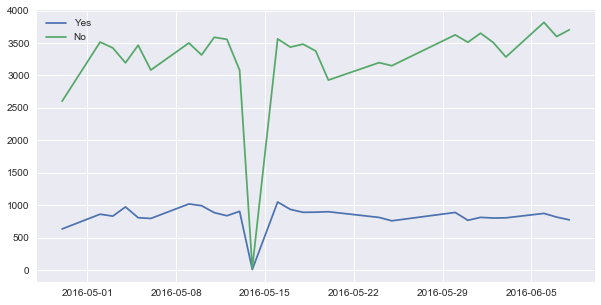

In [189]:
data = pd.DataFrame()
data = df.loc[:,['AppointmentDay','No-show']]

#separate 'Yes','No'
yes = data[data['No-show'].str.contains('Y')]
no = data[data['No-show'].str.contains('N')]

#count 'yes','No'
yes = df.groupby(yes['AppointmentDay'])['No-show'].count()
no = df.groupby(no['AppointmentDay'])['No-show'].count()

#plot
plt.figure(figsize=(10,5))
plt.plot(yes, label='Yes')
plt.plot(no, label='No')
plt.legend()

In [3]:
## データフレーム作成
feature_dframe = pd.DataFrame()
feature_dframe['Age'] = df['Age']
feature_dframe['Patientld'] = df['PatientId']
feature_dframe['AppointmentID'] = df['AppointmentID']
feature_dframe['Gender'] = df['Gender'].apply(lambda g:1 if g == 'M' else 0)
feature_dframe['SMS_received'] = df['SMS_received']
feature_dframe['Handcap'] = df['Handcap']
feature_dframe['Alcoholism'] = df['Alcoholism']
feature_dframe['Diabetes'] = df['Diabetes']
feature_dframe['Hipertension'] = df['Hipertension']
feature_dframe['Scholarship'] = df['Scholarship']
feature_dframe['No-show'] = df['No-show'].apply(lambda g:1 if g == 'Yes' else 0)

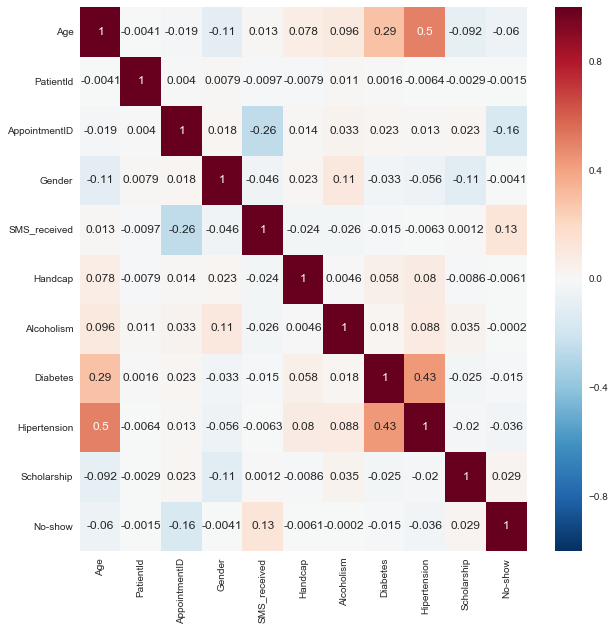

In [5]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(feature_dframe.corr(), annot=True)

In [23]:
X=feature_dframe.iloc[:,0:10].values
y=feature_dframe.iloc[:,10].values
#データをわける
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1,
                  train_size=0.7,
                  test_size=0.3,
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=15,criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.82070106504
0.800054283905


In [27]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth=15, criterion='entropy',random_state=0)
tree_clf.fit(X_train,y_train)

print(tree_clf.score(X_train, y_train))
print(tree_clf.score(X_test, y_test))

0.826426946541
0.787388039446
